In [ ]:
# 1. Upload file Excel
from google.colab import files
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

uploaded = files.upload()

# 2. Ambil nama file Excel dari hasil upload
filename = list(uploaded.keys())[0]

# 3. Baca Excel jadi DataFrame
df = pd.read_excel(io.BytesIO(uploaded[filename]))

# 4. Lihat isi file
df.head()

Saving harga-gula-pasir-lokal-di-pasar-modern-periode-mei-2024-2025.xlsx to harga-gula-pasir-lokal-di-pasar-modern-periode-mei-2024-2025.xlsx


,Nama Data,Papua Barat
0,2024-07-05,20.4
1,2024-07-08,20.4
2,2024-07-09,20.4
3,2024-07-10,20.4
4,2024-07-11,20.4


In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Papua Barat']]) # Kolom 'Papua Barat'

# Buat DataFrame untuk hasil normalisasi
normalized_df = pd.DataFrame(scaled_data,
                             columns=['Nilai_Ternormalisasi'])
print("\n=== Hasil Normalisasi (10 data pertama) ===")
print(normalized_df.head(10))

# 3. Windowing
def windowed_dataset(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

window_size = 3
X, y = windowed_dataset(scaled_data, window_size)

# 4. Tampilkan Hasil Windowing
# Tampilkan 5 window pertama dalam bentuk tabel
window_df = pd.DataFrame(X[:5].reshape(5, window_size), columns=[f'T-({window_size - i})' for i in range(window_size)])
window_df['Target'] = y[:5]

print("\n=== Contoh Hasil Windowing (5 data pertama) ===")
print(window_df)


=== Hasil Normalisasi (10 data pertama) ===
   Nilai_Ternormalisasi
0              0.674419
1              0.674419
2              0.674419
3              0.674419
4              0.674419
5              0.674419
6              0.674419
7              0.674419
8              0.186047
9              0.186047

=== Contoh Hasil Windowing (5 data pertama) ===
      T-(3)     T-(2)     T-(1)    Target
0  0.674419  0.674419  0.674419  0.674419
1  0.674419  0.674419  0.674419  0.674419
2  0.674419  0.674419  0.674419  0.674419
3  0.674419  0.674419  0.674419  0.674419
4  0.674419  0.674419  0.674419  0.674419


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, shuffle=False
)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape: (117, 3, 1)
X_test shape : (79, 3, 1)
y_train shape: (117, 1)
y_test shape : (79, 1)


In [ ]:
print("\nContoh X_train[0]:", X_train[0].flatten())
print("Target y_train[0]:", y_train[0][0])


Contoh X_train[0]: [0.6744186 0.6744186 0.6744186]
Target y_train[0]: 0.6744186046511622


In [ ]:
print("\nContoh X_train[0]:", X_train[0].flatten())
print("Target y_train[0]:", y_train[0][0])


Contoh X_train[0]: [0.6744186 0.6744186 0.6744186]
Target y_train[0]: 0.6744186046511622


In [ ]:
# Tampilkan 3 data awal dari X_test dan targetnya
test_window_df = pd.DataFrame(X_test[:3].reshape(3, X_test.shape[1]),
                              columns=[f'T-({X_test.shape[1]} - i)' for i
                                       in range(X_test.shape[1])])
test_window_df['Target'] = y_test[:3]
print("\nContoh isi X_test:")
print(test_window_df)


Contoh isi X_test:
   T-(3 - i)  T-(3 - i)  T-(3 - i)  Target
0        0.0        0.0        0.0     0.0
1        0.0        0.0        0.0     0.0
2        0.0        0.0        0.0     0.0


In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(window_size,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0670 - val_loss: 0.6667
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0490 - val_loss: 0.4948
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0235 - val_loss: 0.3711
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0192 - val_loss: 0.2673
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0093 - val_loss: 0.1869
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077 - val_loss: 0.1280
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0042 - val_loss: 0.0916
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0056 - val_loss: 0.0714
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0053 - val_loss: 0.0632
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0052 - val_loss: 0.0664
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0044 - val_loss: 0.0738
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0048 - val_loss: 0.0793
Epoch 13/50


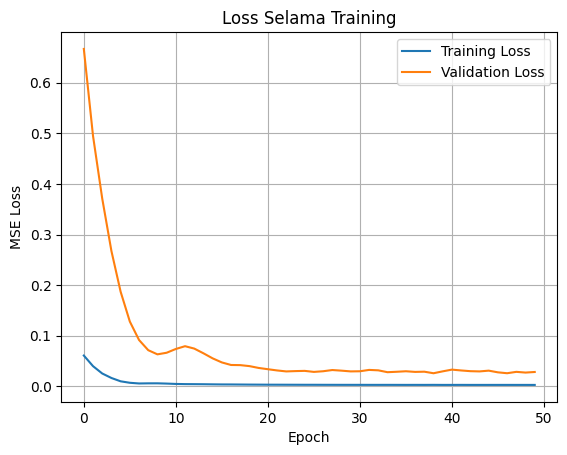

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Selama Training')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


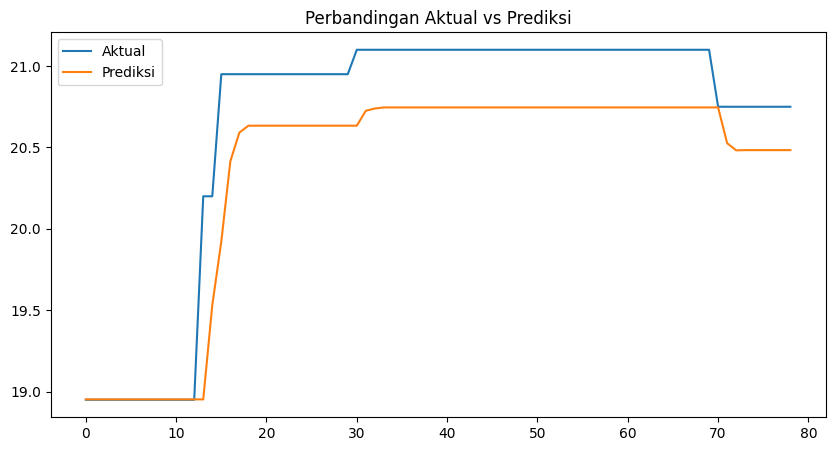

In [ ]:
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Aktual')
plt.plot(y_pred_inv, label='Prediksi')
plt.legend()
plt.title('Perbandingan Aktual vs Prediksi')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("RMSE:", rmse)

RMSE: 0.3620127777468439
